# Personal Library

This is a collection of my personal typical code usage in Data Science Projects. The purpose of this file is to gather basic and advance code snippet which i usually used for data science projects.

# Step 0: Imports and Reading Data¶


In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_ori = pd.read_csv('coaster_db.csv')
df_ori.head()

## Step 1: Data Understanding¶


In [ ]:
# Make a copy of the DataFrame to avoid modifying the original
df = df_ori.copy() 

In [ ]:
df.shape

In [ ]:
df.head(5)

In [ ]:
df.columns

In [ ]:
df.dtypes

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
# check for duplicates
df.duplicated().sum()

In [ ]:
# check for missing values or NaN
df.isnull().sum()

In [ ]:
# check for unique value on each column
df.nunique()

## Step 2: Data Processing¶


* Dropping irrelevant columns and rows
* Identifying duplicated columns
* Renaming Columns
* Convert datetime

In [ ]:
# Example of dropping columns
df = df.drop(['Column1', 'Column2'], axis=1)

In [ ]:
# Rename column
df.rename(columns={'Exited':'Churn'}, inplace=True)

In [ ]:
#identify duplicated row
df.loc[df.duplicated()]

# Check for duplicate coaster name
df.loc[df.duplicated(subset=['Coaster_Name'])].head(5)

# Checking an example duplicate
df.query('Coaster_Name == "Crystal Beach Cyclone"')

#use ~ to take the inverse
df = df.loc[~df.duplicated(subset=['Coaster_Name','Location', 'Opening_Date'])].reset_index(drop=True).copy()

#### Handling Datetime

In [3]:
#change string dtype to datetime
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [ ]:
# Extract components
df['year'] = df['date_column'].dt.year
df['month'] = df['date_column'].dt.month
df['day'] = df['date_column'].dt.day
df['hour'] = df['date_column'].dt.hour
df['minute'] = df['date_column'].dt.minute
df['second'] = df['date_column'].dt.second


In [ ]:
# Filtering
# Example: Filter rows where the date is in a specific range
start_date = pd.to_datetime('2024-01-01')
end_date = pd.to_datetime('2024-01-31')
filtered_df = df[(df['date_column'] >= start_date) & (df['date_column'] <= end_date)]

In [ ]:
# Example: Group by year and calculate mean
yearly_mean = df.groupby(df['date_column'].dt.year).mean()

# Example: Resample to monthly frequency and calculate sum
monthly_sum = df.resample('M', on='date_column').sum()

In [ ]:
# Assuming your datetime data is in UTC and you want to convert it to another timezone
df['date_column'] = df['date_column'].dt.tz_localize('UTC').dt.tz_convert('America/New_York')

### Handling Address

In [ ]:
# standardizing address column
df['address'] = df['address'].str.upper().str.strip()

In [ ]:
# Example of parsing address components (depend on the address format)
df['street'] = df['address'].str.split(',').str[0]
df['city'] = df['address'].str.split(',').str[1]
df['state'] = df['address'].str.split(',').str[2].str.strip().str.split(' ').str[0]
df['zip_code'] = df['address'].str.split(',').str[2].str.strip().str.split(' ').str[1]

In [ ]:
# Handling missing address
# Example of dropping rows with missing addresses
df.dropna(subset=['address'], inplace=True)

# Example of filling missing values for street and city with placeholders
df['street'].fillna('Unknown', inplace=True)
df['city'].fillna('Unknown', inplace=True)

#### Clean Uniques Symbols

In [ ]:
# Inspect Data: First, inspect the data to understand the types of unique symbols present in the "remarks" column and the patterns of text.
unique_remarks = df['colums'].unique()
print(unique_remarks)

In [ ]:
# Example: Removing special characters and converting to lowercase
df = df['column'].str.replace('[^a-zA-Z0-9\s]', '').str.lower()


In [ ]:
# Example: Replace abbreviations or synonyms with full words
df = df['column'].str.replace('abbr', 'abbreviation')

In [ ]:
# Example: Tokenization and Lemmatization using NLTK
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

df['clean_remarks'] = df['clean_remarks'].apply(lemmatize_text)


In [ ]:
# Example: Removing stopwords using NLTK
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return ' '.join(filtered_tokens)

df['clean_remarks'] = df['clean_remarks'].apply(remove_stopwords)


### Handling Missing Values

In [ ]:
### OPTION 1: Remove Rows or Columns

# Remove rows with any missing values
cleaned_df = df.dropna()

# Remove columns with any missing values
cleaned_df = df.dropna(axis=1)

# Remove rows with missing values in specific columns
cleaned_df = df.dropna(subset=['column1', 'column2'])

In [ ]:
# OPTION 2: Filling missing values: 

# Fill missing values with zero
cleaned_df = df.fillna(0)

# Fill missing values with mean of the column
cleaned_df = df.fillna(df.mean())

# Fill missing values with median of the column
cleaned_df = df.fillna(df.median())

# Fill missing values with mode of the column
cleaned_df = df.fillna(df.mode().iloc[0])

In [ ]:
# OPTION 3: Forward or backward filling:

# Forward fill missing values (use value from previous row to fill missing)
cleaned_df = df.ffill()

# Backward fill missing values (use value from next row to fill missing)
cleaned_df = df.bfill()

In [ ]:
# OPTION 4: Interpolation: Interpolate missing values based on the values of adjacent data points. This is useful for time-series data.

# Linear interpolation
cleaned_df = df.interpolate(method='linear')

# Polynomial interpolation (using higher-order polynomials)
cleaned_df = df.interpolate(method='polynomial', order=2)


In [2]:
# OPTION 5: KNN Imputation

# Imputation using KNN
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
cleaned_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


### Handling Outliers

Visualize the data: Before deciding on a method to handle outliers, it's essential to visualize the data to identify outliers. Box plots, histograms, or scatter plots can help in visualizing the distribution and spotting outliers

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot
sns.boxplot(x=df['column_name'])
plt.show()

# Histogram
plt.hist(df['column_name'], bins=20)
plt.show()

# Scatter plot (for multivariate analysis)
plt.scatter(df['column1'], df['column2'])
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.show()


In [3]:
# OPTION 1: Remove Outliers with IQR Method

Q1 = df['CreditScore'].quantile(0.25)
Q3 = df['CreditScore'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df = df[(df['CreditScore'] >= lower_bound) & (df['CreditScore'] <= upper_bound)]

In [ ]:
# OPTION 2: Winsorization: Replace outliers with values at a specified percentile to limit their impact on the analysis.

from scipy.stats.mstats import winsorize

# Winsorize outliers
winsorized_data = winsorize(df['column_name'], limits=[0.05, 0.05])
df['column_name'] = winsorized_data

In [ ]:
# OPTION 3: Transformation: Apply mathematical transformations to the data to reduce the impact of outliers. Common transformations include logarithmic, square root, or inverse transformations
# For highly skewed data, logarithmic transformation is recommended.

import numpy as np

# Log transformation
df['log_transformed_column'] = np.log(df['column_name'])

# If the feature has 0.0 values, use np.log1p (log(1+x)) instead of np.log
df['log_transformed_column'] = np.log1p(df['column_name'])

# Square root transformation
df['sqrt_transformed_column'] = np.sqrt(df['column_name'])

# Inverse transformation
df['inverse_transformed_column'] = 1 / df['column_name']


In [ ]:
# OPTION 4: Removing outliers using Z-Score

from scipy import stats

z_scores = np.abs(stats.zscore(df['Claim_Value']))
threshold = 3  # You can adjust this threshold based on your data, Threshold need to be calculated, 3 means 3 of standard deviation

# Filter the DataFrame to remove outliers
df = df[z_scores < threshold]

# OR manually calculate

df['z_scores'] = (df['Claim_Value'] - df['Claim_Value'].mean())/df['Claim_Value'].std()
df = df(df['z_scores'] < threshold)


In [ ]:
# OPTION 5: Use robust statistical methods: Use statistical methods that are less sensitive to outliers, such as robust regression techniques like RANSAC or robust covariance estimation methods.

from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)


### Convert Text into Vectors
1. Bag of Words: BoW represents text as a numerical vector where each dimension corresponds to a unique word in the vocabulary, and the value represents the frequency of the word in the document.

2. TF-IDF (Term Frequency-Inverse Document Frequency): TF-IDF reflects the importance of a word in a document relative to a collection of documents. It penalizes common words and emphasizes rare words that are more informative. 

3. Word Embeddings: Word embeddings represent words as dense vectors in a continuous vector space. Pre-trained word embeddings like Word2Vec, GloVe, or fastText can be used, or you can train word embeddings specific to your dataset.

In [ ]:
# Sample text data
text_data = df['review_column'].tolist()
max_features = df.shape[0]

In [ ]:
# Using BoW to convert text to vector for tags columns

# BoW
from sklearn.feature_extraction.text import CountVectorizer

def bag_of_words_converter(text_data:list, max_features:int) -> np.array:

    # Create a CountVectorizer object
    vectorizer = CountVectorizer(max_features=max_features, stop_words='english')

    # Fit the vectorizer to the data and transform the text into a bag-of-words vector representation
    bow_vectors = vectorizer.fit_transform(text_data)

    # Convert the sparse matrix to a dense array for visualization (optional)
    bow_vectors_array = bow_vectors.toarray()

    print(f"Bag-of-Words vectors: \n {bow_vectors_array}")
    print(f"Bag-of-Words shape: {bow_vectors_array.shape}")

    return bow_vectors_array

bow_vectors_array = bag_of_words_converter(text_data, max_features)

In [ ]:
# TF-IDF (Term Frequency-Inverse Document Frequency):

from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer to the data and transform the text into a TF-IDF vector representation
tfidf_vectors = tfidf_vectorizer.fit_transform(text_data)

# Convert the sparse matrix to a dense array for visualization (optional)
tfidf_vectors_array = tfidf_vectors.toarray()

print("TF-IDF vectors:")
print(tfidf_vectors_array)

In [ ]:
# Word Embeddings

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)

# Pad sequences to ensure uniform length (required for neural networks)
max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

print("Word Embeddings (Padded sequences):")
print(padded_sequences)

#### Cosine Similarity

Cosine similarity is a measure of similarity between two non-zero vectors in an inner product space. It measures the cosine of the angle between the two vectors and ranges from -1 (opposite directions) to 1 (same direction), with 0 indicating orthogonality (perpendicularity).

In the context of text analysis, cosine similarity is often used to quantify the similarity between two documents represented as numerical vectors, such as Bag-of-Words vectors or TF-IDF vectors. It measures how similar the documents are in terms of their word frequencies or TF-IDF values.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming vectors_a and vectors_b are arrays of vectors
# Calculate cosine similarity between two sets of vectors
cosine_similarities = cosine_similarity(vectors_a, vectors_b)

# Accessing cosine similarity between the first vector in vectors_a and the first vector in vectors_b
similarity_score = cosine_similarities[0][0]


## Step 3: Data Exploration


In [ ]:
# Count values of selected columns
df['columns'].value_counts()

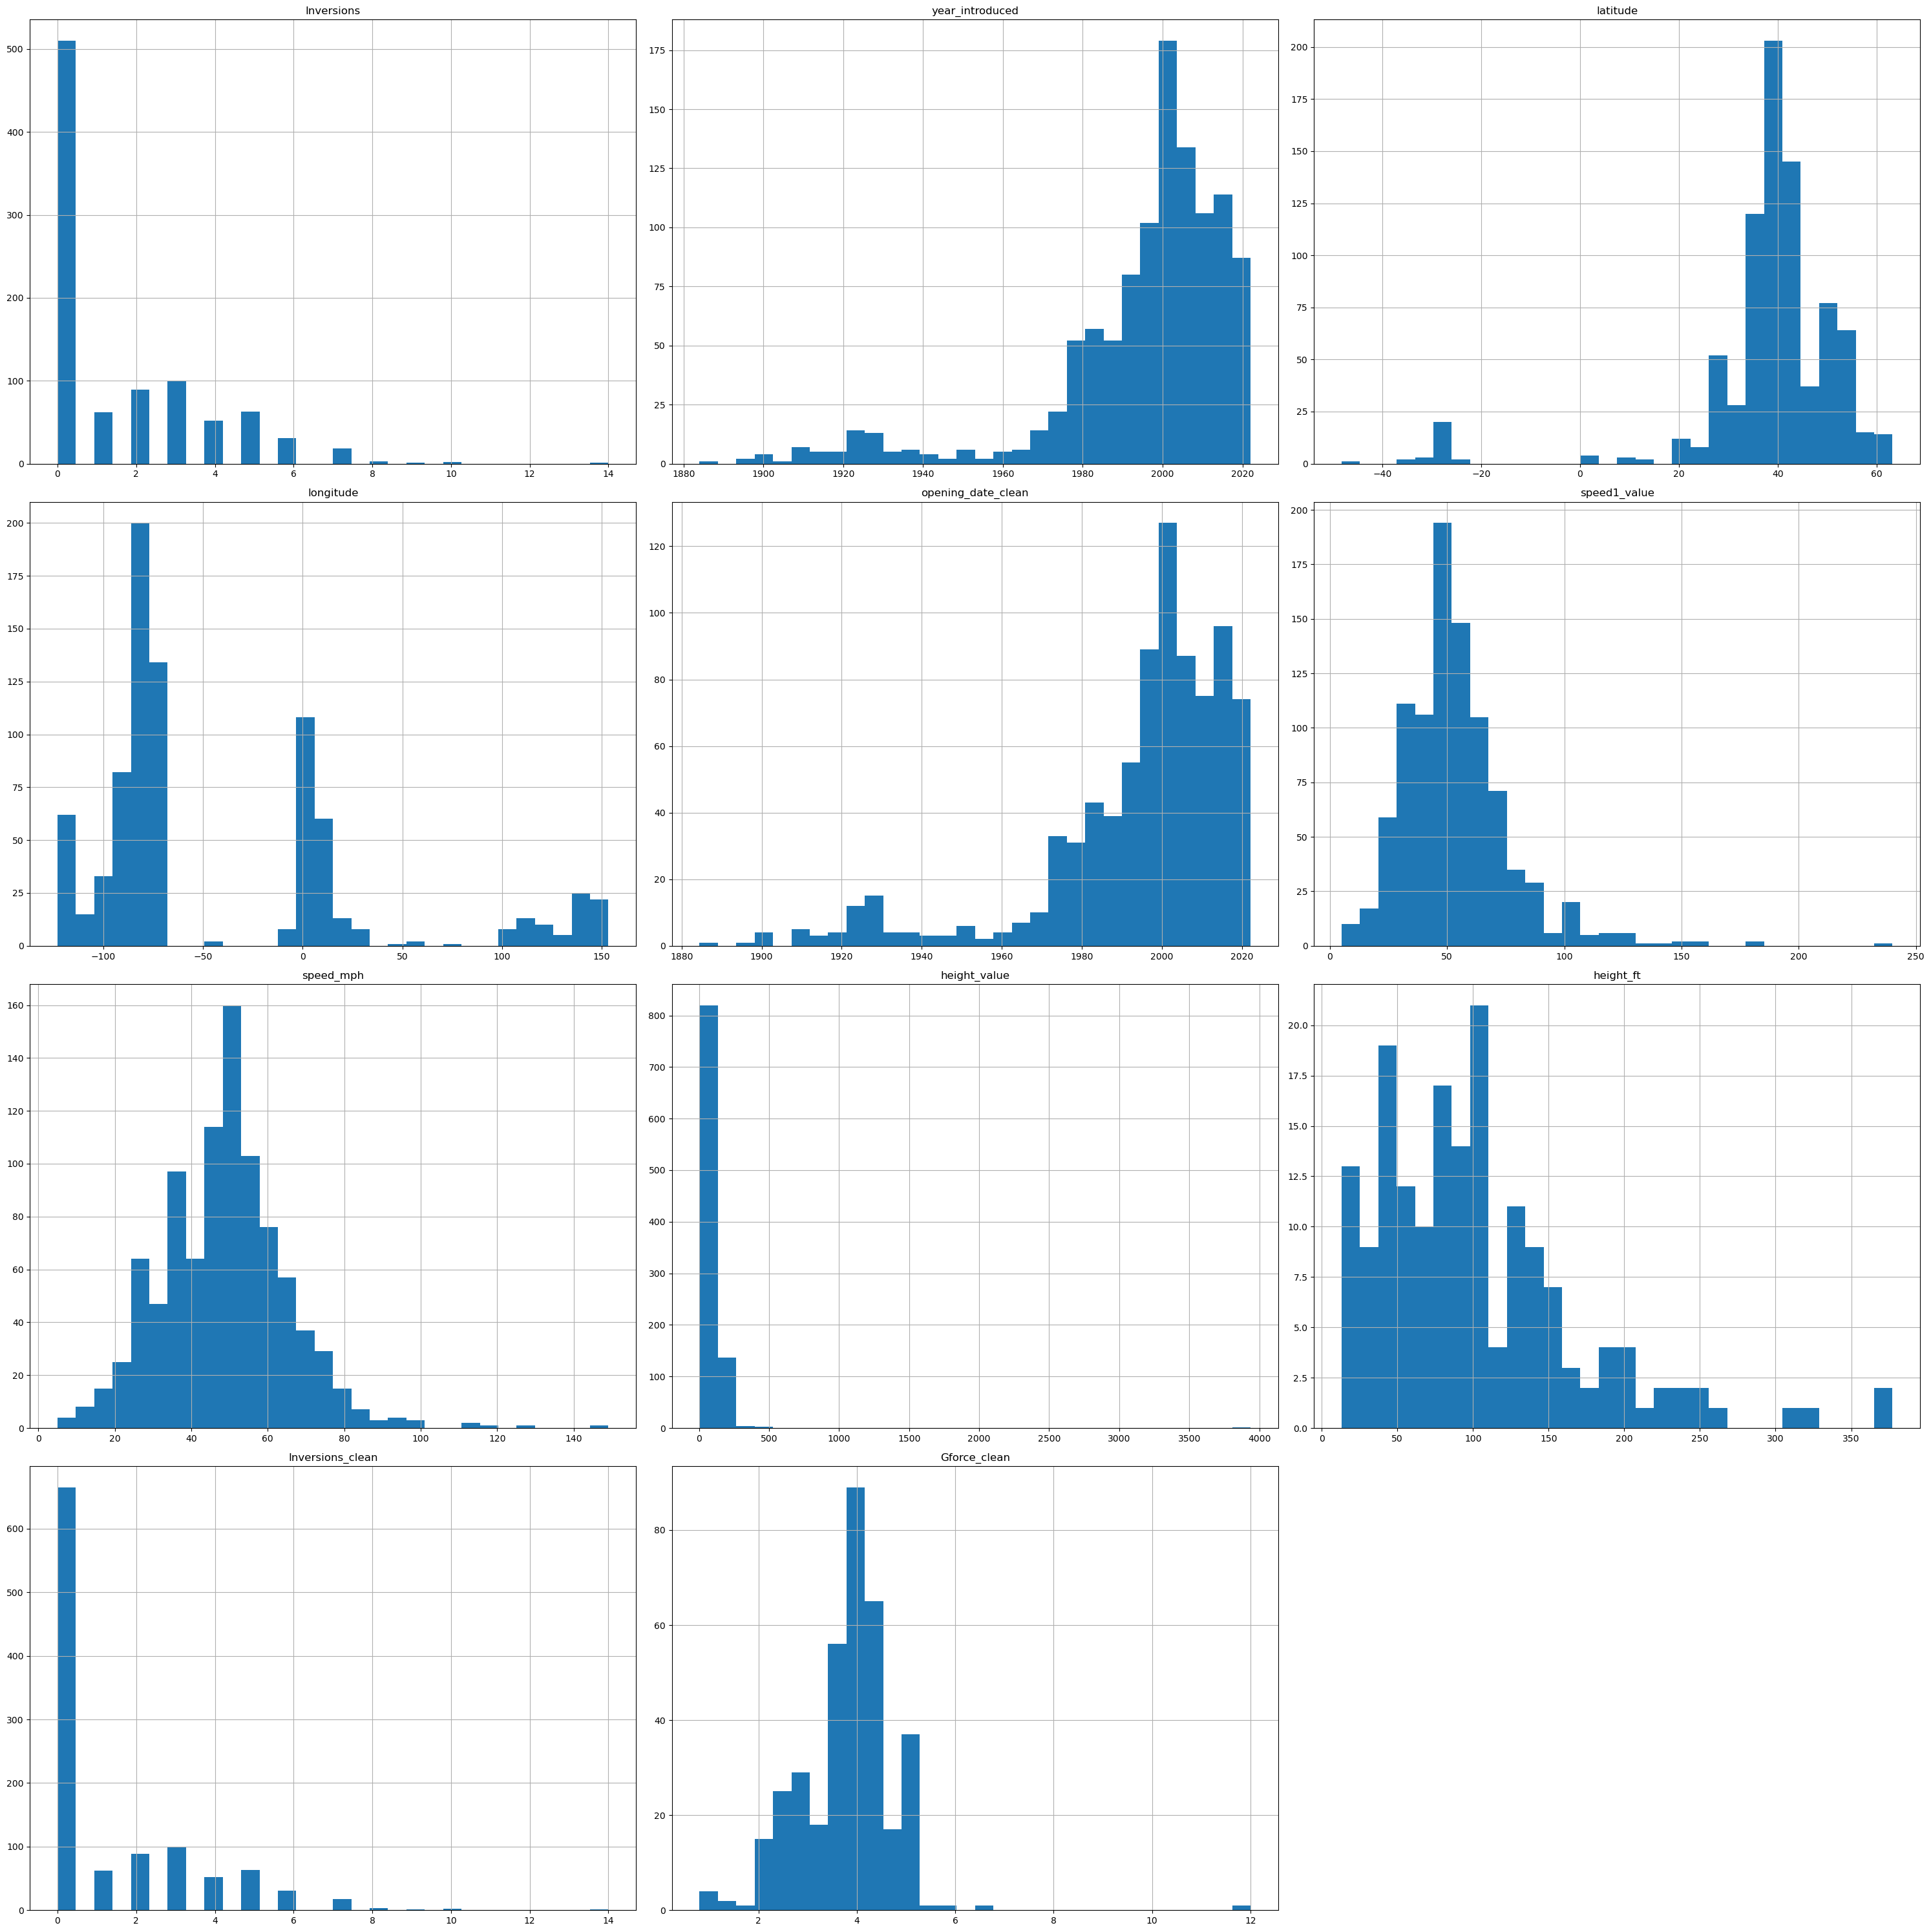

In [4]:
# Quick data distribution overview
df.hist(bins=30, figsize=(30, 30))
plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

In [ ]:
# Split dataset based on classification class.
fraud_df = df[df['Class'] == 1]
not_fraud_df = df[df['Class'] == 0]

## Step 4: Feature Relationships¶


* CountPlot
* Scatterplot
* Heatmap Correlation
* Pairplot
* Groupby comparisons


### Pie Chart

In [ ]:
#pie chart
plt.figure(figsize=(10,6))
plt.pie(df['Class'].value_counts(), labels=['Not Fraud','Fraud'], autopct='%1.2f%%')
plt.title('Class Percentage')
plt.show()

### Histogram

In [ ]:
sns.histplot(x = 'Age', data = df, bins=74, hue='Churn', multiple='stack', kde=True)
plt.title('Distribution of Customer by Age')

# derive the line of mean and median and mode
plt.axvline(df['Age'].mean(), color='g', linestyle='--', label='Mean')
plt.axvline(df['Age'].median(), color='b', linestyle='--', label='Median')
plt.legend()
plt.show()

### Bar Plot

In [ ]:
# Count plot with value
sns.countplot(x='Class', data= df)

# Annotate count values
for i, count in enumerate(df['Class'].value_counts()):
    plt.text(i, count, str(count), ha = 'center',va='bottom')

plt.title("Churn Count")
plt.show()

In [ ]:
# barplot againts target colums (classification)
fig = sns.countplot(data=df, x='Churn', hue='Geography')

# set the x and y labels and title
fig.set_xlabel("Churn")
fig.set_ylabel("Count")
fig.set_title("Countplot of Churn by Geography")

for bars in fig.containers:
    fig.bar_label(bars)

### Count Percentage and Plot

In [ ]:
## Count Percentage
country_count_by_churn = df.groupby(['Geography', 'Churn']).size().unstack(fill_value=0)

# Calculate the total count of customers for each Country
country_total_count = country_count_by_churn.sum(axis=1)

# # Calculate the percentage of churn by Country
churn_percentage_by_country = (country_count_by_churn[1] / country_total_count) * 100

# # Reset the index to use 'Gender' and 'Churn' as columns
churn_percentage_by_country = churn_percentage_by_country.reset_index()

# # Rename columns
churn_percentage_by_country.columns = ['Geography', 'Churn Percentage']
print(churn_percentage_by_country)

In [ ]:
# Bar plot
sns.barplot(x='Geography', y='Churn Percentage', data=churn_percentage_by_country)

# Annotate count values for Gender distribution
for i, count in enumerate(churn_percentage_by_country['Churn Percentage']):
    plt.text(i, count, f"{count:.2f}%", ha='center', va='bottom')

plt.title('Percentage of Churn by Geography')
plt.xlabel('Geography')
plt.ylabel('Percentage of Churn')

plt.show()

### Boxplot and ViolinPlot

In [ ]:
# Check for outliers
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x ='Churn' , y = 'CreditScore', data=df ,ax=ax[0])
ax[0].set_title('Box Plot of CreditScore by Churn')

sns.violinplot(x ='Churn' , y = 'CreditScore', data=df ,ax=ax[1])
ax[1].set_title('Violin Plot of CreditScore by Churn')
plt.show()

### Scatterplot

In [ ]:
#seaborn can do more than standard matplotlib. For example, it can introduce hue using another features
sns.scatterplot(x='Speed_mph', y='Height_ft', data =df, hue='Year_Introduced')
plt.show()

In [ ]:
#comparing selected features between each other (we only compare numerical features)
sns.pairplot(data =df, vars=['Year_Introduced','Speed_mph',
                   'Height_ft','Inversions','Gforce'], hue='Type_Main')

plt.show()

## Step 5: Feature Engineering


## Normalize vs Standardize:
- Using both when we want to use gradient model based calculation.(linear/logistic regression , Neural Network)!!
- Not required for tree base calculation such as Decision Tree, Random Forest, K-Mean Clustering, SVM, KNN, XG Boost!!

#### Normalization
- Normalize data to a specific range, typically [0, 1].
- Useful when the features have different scales and you want them all to be within a consistent range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalization_continuous_variables(df:pd.DataFrame, columns:list):
    """
    Normalizes continuous variables in a DataFrame using MinMaxScaler.

    Parameters:
    - df: pandas DataFrame
        Input DataFrame containing the columns to be normalized.
    - columns: list of strings
        List of column names to be normalized.

    Returns:
    - df: pandas DataFrame
        DataFrame with specified columns normalized.
    """
    df_copy = df.copy()  # Make a copy of the DataFrame to avoid modifying the original
    minmax_scaler = MinMaxScaler()
    df_copy[columns] = minmax_scaler.fit_transform(df_copy[columns])
    return df_copy

# Specify columns to be normalized
columns_to_normalize = ['CreditScore', 'Balance', 'EstimatedSalary']

# Normalize continuous variables
df = normalization_continuous_variables(df, columns_to_normalize)
df.head()

#### Standardization
- Standardize data to have a mean (*μ*) of 0 and a standard deviation (*σ*) of 1.
- Suitable when features have different means and standard deviations.

In [ ]:
from sklearn.preprocessing import StandardScaler

def standardization_continuous_variables(df:pd.DataFrame, columns:list):
    """
    Normalizes continuous variables in a DataFrame using StandardScaler.

    Parameters:
    - df: pandas DataFrame
        Input DataFrame containing the columns to be normalized.
    - columns: list of strings
        List of column names to be normalized.

    Returns:
    - df: pandas DataFrame
        DataFrame with specified columns normalized.
    """
    df_copy = df.copy()  # Make a copy of the DataFrame to avoid modifying the original
    standard_scaler = StandardScaler()
    df_copy[columns] = standard_scaler.fit_transform(df_copy[columns])
    return df_copy

# Specify columns to be standardized
columns_to_standardize = ['CreditScore', 'Balance', 'EstimatedSalary']

# Standardization continuous variables
df = standardization_continuous_variables(df, columns_to_standardize)
df.head()

#### RobustScalar
- is a preprocessing technique used in machine learning to scale features of a dataset. It is robust to outliers, meaning it scales the data based on statistics that are robust to outliers rather than the mean and standard deviation. This makes it suitable for datasets that contain outliers or have a non-Gaussian distribution.

In [ ]:
from sklearn.preprocessing import RobustScaler

def robust_scaling(df:pd.DataFrame, columns:list):
    """
    Normalizes continuous variables in a DataFrame using RobustScaler.

    Parameters:
    - df: pandas DataFrame
        Input DataFrame containing the columns to be normalized.
    - columns: list of strings
        List of column names to be normalized.

    Returns:
    - df: pandas DataFrame
        DataFrame with specified columns normalized.
    """
    df_copy = df.copy()  # Make a copy of the DataFrame to avoid modifying the original
    robust_scaler = RobustScaler()
    df_copy[columns] = robust_scaler.fit_transform(df_copy[columns])
    return df_copy

#### One-Hot Encoding
For Geography and Gender (Categorical -> Nominal Type)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

In [ ]:
def one_hot_encode(df:pd.DataFrame, columns:list):
    """
    Performs one-hot encoding for multiple columns in a DataFrame.

    Parameters:
    - df: pandas DataFrame
        Input DataFrame containing the columns to be one-hot encoded.
    - columns: list of strings
        List of column names to be one-hot encoded.

    Returns:
    - df: pandas DataFrame
        DataFrame with specified columns one-hot encoded.
    """
    df = df.copy() # Make a copy of the DataFrame to avoid modifying the original
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df

# Specify columns to be one-hot encoded
columns_to_encode = ['Gender', 'Geography']

# Perform one-hot encoding
df = one_hot_encode(df, columns_to_encode).astype(int)
df.head()


#### Label Encoding
label encoding for categorical -> Ordinal type (shoe size, severity)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
def label_encode(df:pd.DataFrame, columns:list):
    """
    Performs label encoding for multiple columns in a DataFrame.

    Parameters:
    - df: pandas DataFrame
        Input DataFrame containing the columns to be label encoded.
    - columns: list of strings
        List of column names to be label encoded.

    Returns:
    - df: pandas DataFrame
        DataFrame with specified columns label encoded.
    """
    df = df.copy()  # Make a copy of the DataFrame to avoid modifying the original
    
    for column in columns:
        df[column] = encoder.fit_transform(df[column])
    return df

# Specify columns to be label encoded
columns_to_encode = ['Size', 'Severity']

# Perform label encoding
df = label_encode(df, columns_to_encode)
df.head()  

# Handling Imbalance Dataset

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

def prepare_data_rus_smote_mix(X:pd.DataFrame, y:pd.DataFrame, rus_sampling_strategy:str='auto', smote_sampling_strategy:str='auto', enable_rus:bool=True, enable_smote:bool=True, test_size:float=0.2):
    """
    Prepare data for classification by balancing class distribution through a combination of Random Undersampling (RUS) and Synthetic Minority Oversampling Technique (SMOTE).

    Parameters:
    X (DataFrame): Feature columns of the dataset.
    y (Series): Target column of the dataset.
    rus_sampling_strategy (str): Sampling strategy for RandomUnderSampler. Default is 'auto'.
    smote_sampling_strategy (str): Sampling strategy for SMOTE. Default is 'auto'.
    enable_rus (bool): Flag to enable RandomUnderSampler. Default is True.
    enable_smote (bool): Flag to enable SMOTE. Default is True.
    test_size (float): Ratio of the dataset to include in the test split. Default is 0.2.

    Returns:
    X_train (DataFrame): Training set features.
    X_test (DataFrame): Testing set features.
    y_train (Series): Training set target.
    y_test (Series): Testing set target.
    """
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # print('Before resampling:')
    # print('Train set:')
    # print(y_train.value_counts())
    # print('Test set:')
    # print(y_test.value_counts())

    # Undersample the majority class on Train dataset only
    if enable_rus:
        rus = RandomUnderSampler(random_state=42, sampling_strategy=rus_sampling_strategy)
        X_train, y_train = rus.fit_resample(X_train, y_train)
        # print('After RUS:')
        # print(y_train.value_counts())

    # Oversample the minority class on Train dataset only
    if enable_smote:
        smote = SMOTE(random_state=42, sampling_strategy=smote_sampling_strategy)
        X_train, y_train = smote.fit_resample(X_train, y_train)
        # print('After SMOTE:')
        # print(y_train.value_counts())

    # Print class distribution after resampling
    print('After resampling:')
    print('Train set:')
    print(y_train.value_counts())
    print('Test set:')
    print(y_test.value_counts())

    return X_train, X_test, y_train, y_test


In [ ]:
# Separate features and target variable
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
# rus_sampling_strategy=0.1 -> reducing to 10% of majority class
# smote_sampling_strategy=0.25 -> increasing 25% of minotiry class
X_train, X_test, y_train, y_test = prepare_data_rus_smote_mix(X, y, rus_sampling_strategy=0.1, 
                                                              smote_sampling_strategy=0.25,
                                                              enable_rus=True,
                                                              enable_smote=True,
                                                              test_size=0.2)